In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

### Merging 12 months of sales data into a single file

Also a single csv just in case that we need it

In [2]:
mainpath = "/home/nicolasterroni/projects/cursos/data-analysis-and-machine-learning/datasets"
#csv_files = [file for files in os.listdir("mainpath")]

# We also can use:
csv_files = glob.glob(os.path.join(mainpath+"/Sales_Data/", "*.csv"))

data = pd.DataFrame()

for file in csv_files:
    new_data =  pd.read_csv(file)
    data = pd.concat([data,new_data],axis=0)
    
# remove headers
trash_data = data.loc[data['Order Date']=='Order Date'].index
data.drop(trash_data, inplace = True) 

# save all data in a single csv file
data.to_csv(mainpath+"/full_dataset/Sales_all_2019.csv",index=False)

### Clean data

In [3]:
# headers of all csvs in our main dataset
trash_data = data.loc[data['Order Date']=='Order Date'].index
data.drop(trash_data, inplace = True) 
data = data.dropna(axis=0,how="all")

In [4]:
data['DateTime'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')
                                  
data['Month'] = data['DateTime'].dt.month
data['Month'] = pd.to_numeric(data['Month'])

data = data.drop(['Order Date'],axis=1)

data['Order ID'] = pd.to_numeric(data['Order ID'])
data['Product'] = data['Product'].astype(str)
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Purchase Address'] = data['Purchase Address'].astype(str)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,DateTime,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4


### Which was the best month for sales?

##### Group sales per month

In [5]:
grouped_by_month = data.groupby(data["Month"])
groups_keys = grouped_by_month.groups.keys()

##### Sum sales per month

In [6]:
sales_for_each_month = {}
for group in groups_keys:
    sales_for_each_month[group] = 0
    month_sales = grouped_by_month.get_group(group)
    for index, row in month_sales.iterrows():
        value = float(row['Price Each']) * int(row['Quantity Ordered'])
        sales_for_each_month[group] += round(value,2)
sales_for_each_month

{1: 1786511.289999915,
 2: 2158127.479999929,
 3: 2755969.40000032,
 4: 3336376.4200006723,
 5: 3101881.0400005206,
 6: 2524464.990000136,
 7: 2587444.910000183,
 8: 2191698.3099999647,
 9: 2050361.2599998936,
 10: 3679254.160000939,
 11: 3149785.0900005554,
 12: 4557905.420001494}

It was december with 4557905.42

##### Better solution and plot

In [7]:
# maybe this column would have helped
data['Total Amount'] = round((data['Price Each']*data['Quantity Ordered']).astype(float),2)
data.groupby("Month").sum()

,Order ID,Quantity Ordered,Price Each,Total Amount
Month,,,,
1,1391148846,10670,1776155.79,1786511.29
2,1832181724,13162,2145208.87,2158127.48
3,2520234917,16697,2740393.12,2755969.40
4,3333217539,20226,3313522.35,3336376.42
5,3289290354,18344,3084756.09,3101881.04
6,2876409942,14964,2508863.49,2524464.99
7,3224356195,15781,2572764.75,2587444.91
8,2840777365,13185,2178183.81,2191698.31
9,2886380303,12827,2038019.59,2050361.26


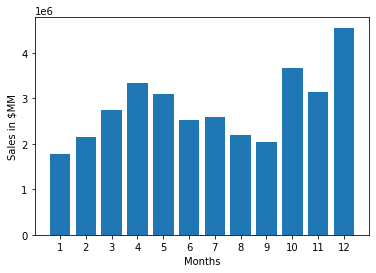

In [8]:
results = data.groupby("Month").sum()
months = range(1,13)
plt.bar(months,results["Total Amount"])
plt.xticks(months)
plt.ylabel("Sales in $MM")
plt.xlabel("Months")
plt.show()

### What city had the highest numbers of sales?

In [9]:
# First solution
# data["City"] = data["Purchase Address"].str.split(",",1, expand=True)[1].str.split(",",1, expand=True)[0]

# But lambdas are more readable, and also allows us to access the cell content in an easer way
data["City"] = data["Purchase Address"].apply(lambda entire_address: entire_address.split(',')[1])
data.groupby("City").sum()

,Order ID,Quantity Ordered,Price Each,Month,Total Amount
City,,,,,
Atlanta,3366679952,16304,2726247.35,103160,2741642.05
Austin,2238557673,10933,1777231.68,68570,1786745.52
Boston,4517043947,22123,3580075.00,138632,3604080.86
Dallas,3360280471,16453,2702619.12,102976,2717793.72
Los Angeles,6698824762,32722,5323915.79,204933,5354039.93
New York City,5643048641,27470,4553287.23,172980,4581658.91
Portland,2823788673,13806,2264580.11,86429,2276649.24
San Francisco,10127798551,49363,8074045.54,310174,8124120.94
Seattle,3350585611,16281,2678871.35,103213,2693048.60


Its San Francisco with 8124120.94

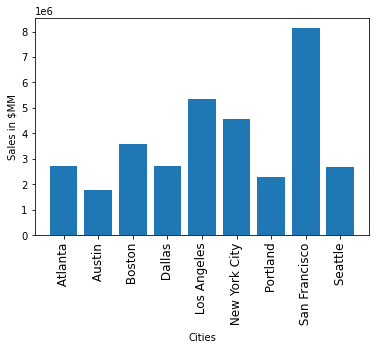

In [18]:
# cities = data["City"].unique() but they're not in the same order that our x so:
cities = [city for city, group_data in data.groupby("City")]
results = data.groupby("City").sum()
plt.bar(cities,results["Total Amount"])
plt.xticks(cities,rotation="vertical",size=12)
plt.ylabel("Sales in $MM")
plt.xlabel("Cities")
plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [25]:
# maybe a frequency histogram showing count of sales in different time ranges 
data['Hour'] = data['DateTime'].dt.hour
data['Hour'] = pd.to_numeric(data['Hour'])
hours = [hour for hour, group_data in data.groupby("Hour")]
data.groupby("Hour").sum()

,Order ID,Quantity Ordered,Price Each,Month,Total Amount
Hour,,,,,
0,886041145,4355,694313.78,27103,698694.76
1,534912819,2579,445316.87,16408,447663.86
2,278467863,1379,233191.25,8371,234191.08
3,189067807,912,141948.06,5816,142976.54
4,196834171,925,160759.69,6081,161350.57
5,298366603,1463,223261.09,9127,224313.72
6,563896980,2767,438446.96,17295,441523.14
7,917068874,4483,730350.33,28389,734595.75
8,1418526035,6917,1175057.60,43181,1181363.76


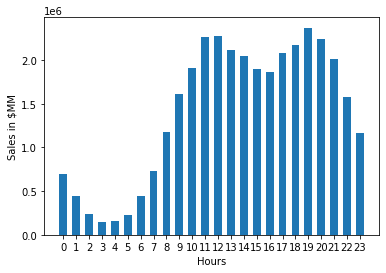

In [32]:
# bar chart of total amount values per hour
results = data.groupby("Hour").sum()
plt.bar(hours,results["Total Amount"],width=0.6)
plt.xticks(hours,size=10)
plt.ylabel("Sales in $MM")
plt.xlabel("Hours")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

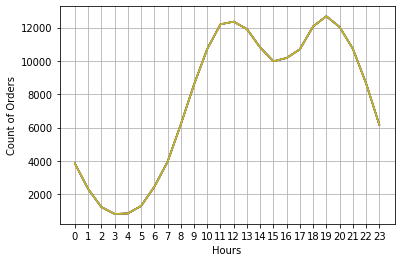

In [34]:
# line chart of count of data for every specific hour
plt.plot(hours,data.groupby("Hour").count())
plt.xticks(hours,size=10)
plt.ylabel("Count of Orders")
plt.xlabel("Hours")
plt.grid()
plt.show

We would recommend to display advertisings right after 11:00 or at 19:00, showing the chart to the client

### What products are most often sold together?

### What product sold the most? Why do you think it sold the most?